# Importing the Libraries

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Defining method

In [148]:
def preparing_table(df_total, years):
    df_total = df_total.replace(": c", -1)
    df_total = df_total.replace(": ", -1)
    df_total = df_total.replace(":", -1)

    for i in years:
        df_total = df_total.rename(columns={i + ' ' : i})
        
    df_tones = df_total[years]
    df_tones = df_tones.apply(pd.to_numeric, errors='coerce')
    
    row_means = df_tones.apply(lambda row: row[row > 0].mean(), axis=1)
    df_total['Mean'] = row_means
    
    cols =[]
    cols = [x for x in years]
    cols.append('Mean')
    
    for index, row in df_total.iterrows():
        # Identify columns with -1 in the current row
        columns_with_minus_one = row.index[row.eq(-1)]

        # Replace -1 with the corresponding values from the 'Mean' column for the identified columns
        df_total.loc[index, columns_with_minus_one] = row['Mean']

    # Convert numeric columns to appropriate data types
    #numeric_columns = rail_total.columns.difference(["geo\\time", "Mean"]).tolist()
    df_total[cols] = df_total[cols].apply(pd.to_numeric, errors="coerce")

    # Round numeric columns to 2 decimals
    df_total[cols] = df_total[cols].round(2)
    
    return df_total

# Reading the dataset

In [149]:
countries = pd.read_csv('data/countries.csv')
countries = countries.rename(columns={"Short": "country"})

In [150]:
years = []
for i in range(2008,2023):
    years.append(i)
    
years = [str(x) for x in years]
#years

In [151]:
products = pd.read_csv('data/products.csv')
products['Code'] = products['Code'].str.strip()

## Rail

In [152]:
rail = pd.read_csv('data/rail_go_grpgood.tsv', sep = r'\t|,')
rail = rail.rename(columns={"geo\\time": "country"})
rail = rail.rename(columns={"nst07": "Product"})
#rail_total = rail
rail_total = rail[(rail['unit'] == 'THS_T') & (rail['Product'] == 'TOTAL')]

rail_total = preparing_table(rail_total, years)
rail_total

C:\Users\nikol\AppData\Local\Temp\ipykernel_10952\1250487534.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  rail = pd.read_csv('data/rail_go_grpgood.tsv', sep = r'\t|,')


,unit,Product,country,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,Mean
1354,THS_T,TOTAL,AT,103870.00,105255.00,97512.00,102575.00,105271.00,107579.00,102835.00,96509.00,95956.00,90624.00,83110.00,89773.00,89729.00,78871.00,96390.64,96390.64
1355,THS_T,TOTAL,BE,50412.75,50412.75,50412.75,50412.75,50412.75,50412.75,50412.75,50412.75,50412.75,50412.75,50412.75,47248.00,52381.00,41180.00,60842.00,50412.75
1356,THS_T,TOTAL,BG,18905.00,17818.00,16102.00,13561.00,14136.00,10974.00,10508.00,12964.00,10963.00,11329.00,11819.00,13678.00,12627.00,12924.00,19233.00,13836.07
1357,THS_T,TOTAL,CH,56513.00,58431.00,56214.00,60000.00,60781.00,59097.00,61148.00,60832.00,60345.00,59505.00,55607.00,61114.00,60418.00,56640.00,63336.00,59332.07
1358,THS_T,TOTAL,CZ,90797.00,99550.00,90902.00,98804.00,99307.00,96516.00,98034.00,97280.00,91556.00,83957.00,82968.00,87096.00,82900.00,76715.00,95073.00,91430.33
1359,THS_T,TOTAL,DE,358858.00,357564.00,320143.00,340558.00,341925.00,334607.00,350105.00,367314.00,365003.00,373738.00,366140.00,374737.00,355715.00,312087.00,371298.00,352652.80
1360,THS_T,TOTAL,DK,7759.00,6936.00,8615.00,8512.00,9097.00,9314.00,9383.00,8652.00,8082.00,7942.00,8868.00,9259.00,8101.00,6116.00,7137.00,8251.53
1361,THS_T,TOTAL,EE,17713.00,23306.00,15801.00,21341.00,27813.00,27256.00,25364.00,28026.00,36289.00,43682.00,44725.00,48378.00,46705.00,45954.00,52752.00,33673.67
1362,THS_T,TOTAL,EL,1142.00,1425.00,1277.00,1313.00,1358.00,1328.00,1094.00,1404.00,2143.00,1980.00,2272.00,2702.00,3982.00,3377.00,4253.00,2070.00
1363,THS_T,TOTAL,ES,24895.00,24716.00,20682.00,24775.00,26406.00,26678.00,24313.00,26698.00,27217.00,22384.00,19544.00,18843.00,16648.00,16563.00,22013.00,22825.00


## Road

In [153]:
road = pd.read_csv('data/road_go_ta_tg_page_tabular.tsv', sep = r'\t|,')
road = road.rename(columns={"geo\TIME_PERIOD": "country"})
road = road.rename(columns={"nst07": "Product"})
road_total = road

road_total = preparing_table(road_total, years)
road_total.head(3)

C:\Users\nikol\AppData\Local\Temp\ipykernel_10952\1018028213.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  road = pd.read_csv('data/road_go_ta_tg_page_tabular.tsv', sep = r'\t|,')


,freq,tra_type,Product,unit,country,2008,2009,2010,2011,2012,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Mean
0,A,TOTAL,TOTAL,THS_T,AT,369460.0,336698.0,331042.0,344747.0,333971.0,...,349544.0,351068.0,376399.0,386858.0,393312.0,402079.0,373068.0,403510.0,390424.0,364510.87
1,A,TOTAL,TOTAL,THS_T,BE,317637.0,297879.0,296189.0,289203.0,291380.0,...,299476.0,295057.0,291522.0,300121.0,285526.0,283979.0,273251.0,277828.0,273307.0,291530.87
2,A,TOTAL,TOTAL,THS_T,BG,176345.0,147838.0,130989.0,136840.0,141622.0,...,155089.0,163742.0,150410.0,155345.0,145987.0,116231.0,139119.0,162460.0,163160.0,149835.60


### Inland

In [154]:
inland = pd.read_csv('data/iww_go_atygo_page_tabular.tsv', sep = r'\t|,')

inland = inland.rename(columns={"geo\TIME_PERIOD": "country"})
inland = inland.rename(columns={"nst07": "Product"})
inland_total = inland[(inland['unit'] == 'THS_T') & (inland['Product'] == 'TOTAL') & (inland['tra_cov'] == 'TOTAL')]

inland_total = preparing_table(inland_total, years)
inland_total.head(3)

C:\Users\nikol\AppData\Local\Temp\ipykernel_10952\3568617974.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  inland = pd.read_csv('data/iww_go_atygo_page_tabular.tsv', sep = r'\t|,')


,freq,tra_cov,Product,typpack,unit,country,2007,2008,2009,2010,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Mean
0,A,TOTAL,TOTAL,TOTAL,THS_T,AT,12107,11209.0,9322.0,11052.0,...,10122.0,8599.0,9071.0,9620.0,7202.0,8512.0,8247.0,8271.0,6374.0,9264.53
1,A,TOTAL,TOTAL,TOTAL,THS_T,BE,134647,130350.0,108243.0,161594.0,...,190303.0,188158.0,192938.0,201129.0,NaN,155695.0,156131.0,166160.0,163023.0,168880.14
2,A,TOTAL,TOTAL,TOTAL,THS_T,BG,6622,10956.0,17104.0,18372.0,...,16922.0,17201.0,17467.0,16247.0,15462.0,18449.0,18924.0,18093.0,12548.0,16353.13


### Maritime

In [155]:
maritime = pd.read_csv('data/mar_go_aa_page_tabular.tsv', sep = r'\t|,')

maritime = maritime.rename(columns={"rep_mar\TIME_PERIOD": "country"})
#maritime = maritime.rename(columns={"nst07": "Product"})
maritime_total = maritime[(maritime['unit'] == 'THS_T')]

maritime_total = preparing_table(maritime_total, years)
maritime_total.head(3)

C:\Users\nikol\AppData\Local\Temp\ipykernel_10952\1137462683.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  maritime = pd.read_csv('data/mar_go_aa_page_tabular.tsv', sep = r'\t|,')


,freq,direct,unit,country,1997,1998,1999,2000,2001,2002,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Mean
0,A,TOTAL,THS_T,BE,161621,171026,165557,179381,174181,173824,...,237852,241459,253543,257865,270317,277783,268675.0,288827.0,288229.0,249658.07
1,A,TOTAL,THS_T,BG,27061.466667,27061.466667,27061.466667,27061.466667,20192,20390,...,27235,27166,28685,30953,27868,30997,25258.0,25576.0,30731.0,27061.47
2,A,TOTAL,THS_T,CY,7622.533333,7622.533333,7622.533333,7622.533333,7622.533333,7220,...,7186,10268,10259,7860,6948,7428,7473.0,6985.0,8235.0,7622.53


### Air

In [156]:
air = pd.read_csv('data/avia_gooc_page_tabular.tsv', sep = r'\t|,')

air = air.rename(columns={"geo\TIME_PERIOD": "country"})
#air = air.rename(columns={"nst07": "Product"})
#air_total = air[(air['unit'] == 'THS_T')]
air_total = air

air_total = preparing_table(air_total, years)
air_total[years] = air_total[years] / 1000
air_total.head(3)

C:\Users\nikol\AppData\Local\Temp\ipykernel_10952\2970134492.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  air = pd.read_csv('data/avia_gooc_page_tabular.tsv', sep = r'\t|,')


,freq,unit,tra_meas,schedule,tra_cov,country,2007,2008,2009,2010,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Mean
0,A,T,FRM_LD_NLD,TOT,TOTAL,AT,206643,206.2210,202.6420,236.6330,...,217.7850,216.6210,223.4212,227.6428,237.7006,228.2234,165.0132,194.8202,188.1822,210557.04
1,A,T,FRM_LD_NLD,TOT,TOTAL,BA,11518.7,11.5187,11.5187,11.5187,...,11.5187,11.5187,11.5187,11.5187,11.5187,11.5187,11.5187,11.5187,11.5187,11518.70
2,A,T,FRM_LD_NLD,TOT,TOTAL,BE,1203245,1071.3460,836.4090,953.5823,...,1014.5856,1126.2341,1088.7340,1251.1730,1416.4280,1397.5130,1584.6400,2083.6320,1729.3320,1230573.24


# Question 2.2

### Defining Transports List

### EU-27 | Rail

In [157]:
rail_EU = countries.join(rail_total.set_index('country'), on='country')
rail_EU = rail_EU.fillna(0)

sum_rail_EU = rail_EU[years].sum().values.tolist()
sum_rail_EU

[1600883.91,
 1296537.67,
 1426304.27,
 1525042.67,
 1461841.75,
 1498099.35,
 1501738.02,
 1500812.02,
 1478573.35,
 1525842.35,
 1547294.35,
 1513403.35,
 1418041.75,
 1546649.75,
 1473582.85]

### EU-27 | Road

In [158]:
road_EU = countries.join(road_total.set_index('country'), on='country')
road_EU = road_EU.fillna(0)

sum_road_EU = road_EU[years].sum().values.tolist()

### EU-27 | Inland

In [159]:
inland_EU = countries.join(inland_total.set_index('country'), on='country')
inland_EU = inland_EU.fillna(0)

sum_inland_EU = inland_EU[years].sum().values.tolist()

### EU-27 | Maritime

In [160]:
maritime_EU = countries.join(maritime_total.set_index('country'), on='country')
maritime_EU = maritime_EU.fillna(0)
maritime_EU = maritime_EU[years] / 1000
sum_maritime_EU = maritime_EU[years].sum().values.tolist()

### EU-27 | Air

In [161]:
air_EU = countries.join(air_total.set_index('country'), on='country')
air_EU = air_EU.fillna(0)

sum_air_EU = air_EU[years].sum().values.tolist()

### Creating Dataframe

In [162]:
df = pd.DataFrame({'Years': years,
                   'Rail': sum_rail_EU,
                   'Road': sum_road_EU,
                   'Inland': sum_inland_EU,
                   'Maritime': sum_maritime_EU,
                  'Air': sum_air_EU})

df = df.set_index('Years')
df

,Rail,Road,Inland,Maritime,Air
Years,,,,,
2008,1600883.91,15396187.0,889124.0,3383.545,11655.5441
2009,1296537.67,13771107.0,756119.0,2965.925,10137.8293
2010,1426304.27,13540791.0,917579.0,3159.121,11757.4437
2011,1525042.67,13526293.0,899478.0,3266.566,12209.1888
2012,1461841.75,12510665.0,917967.0,3241.803,11906.6937
2013,1498099.35,12437175.0,923343.0,3215.905,12039.4213
2014,1501738.02,12657416.0,935342.0,3287.209,13110.2191
2015,1500812.02,12673345.0,914795.0,3343.755,13303.8295
2016,1478573.35,12825667.0,924165.0,3376.703,13794.0548


## Stacked Line Chart

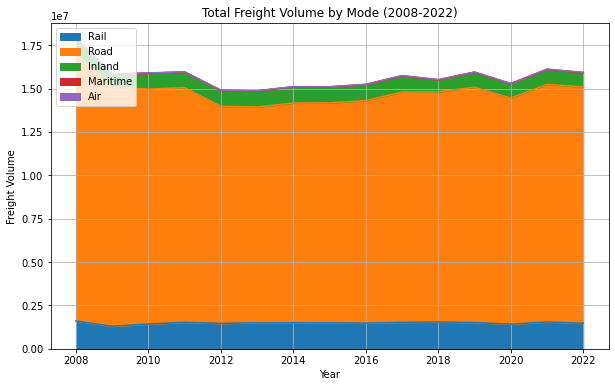

In [163]:
df['Total'] = df.sum(axis=1)
df[['Rail', 'Road', 'Inland', 'Maritime', 'Air']].plot(kind='area', stacked=True, figsize=(10, 6))
plt.title('Total Freight Volume by Mode (2008-2022)')
plt.xlabel('Year')
plt.ylabel('Freight Volume')
plt.legend(loc='upper left')
plt.grid(True)

plt.savefig('Analysis_per_transport_EU/Stacked_Line_Chart.png')

plt.show()

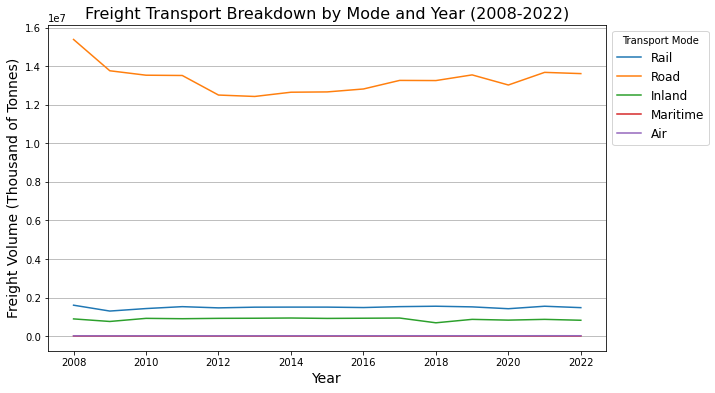

In [164]:
df[['Rail', 'Road', 'Inland', 'Maritime', 'Air']].plot(figsize=(10, 6))
plt.title('Freight Transport Breakdown by Mode and Year (2008-2022)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Freight Volume (Thousand of Tonnes)', fontsize=14)
plt.legend(title='Transport Mode', bbox_to_anchor=(1, 1), fontsize=12)
plt.grid(axis='y')

# Save the figure
plt.savefig('Analysis_per_transport_EU/Line_Chart.png')

# Show the plot
plt.show()

## Rail

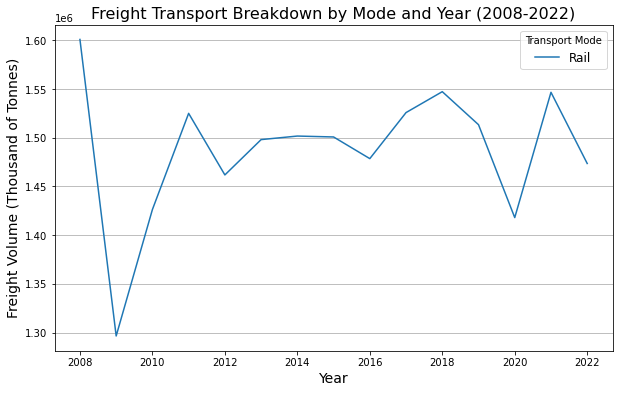

In [173]:
df['Rail'].plot(figsize=(10, 6))
plt.title('Freight Transport Breakdown by Mode and Year (2008-2022)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Freight Volume (Thousand of Tonnes)', fontsize=14)
plt.legend(title='Transport Mode', bbox_to_anchor=(1, 1), fontsize=12)
plt.grid(axis='y')

# Save the figure
plt.savefig('Analysis_per_transport_EU/Rail.png')

# Show the plot
plt.show()

## Road

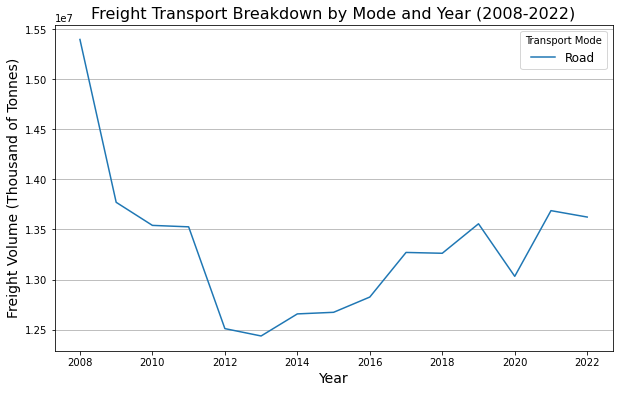

In [174]:
df['Road'].plot(figsize=(10, 6))
plt.title('Freight Transport Breakdown by Mode and Year (2008-2022)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Freight Volume (Thousand of Tonnes)', fontsize=14)
plt.legend(title='Transport Mode', bbox_to_anchor=(1, 1), fontsize=12)
plt.grid(axis='y')

# Save the figure
plt.savefig('Analysis_per_transport_EU/Road.png')

# Show the plot
plt.show()

## Inland

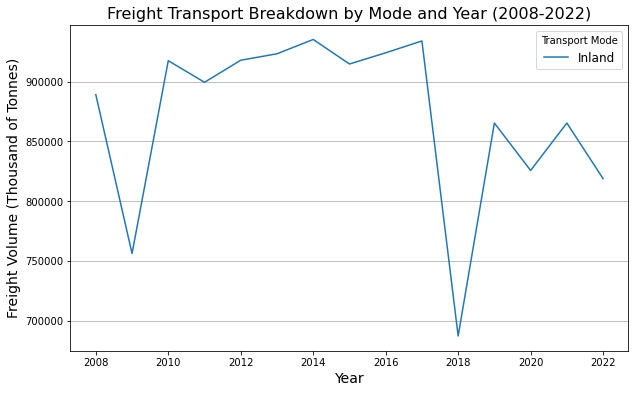

In [178]:
df['Inland'].plot(figsize=(10, 6))
plt.title('Freight Transport Breakdown by Mode and Year (2008-2022)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Freight Volume (Thousand of Tonnes)', fontsize=14)
plt.legend(title='Transport Mode', bbox_to_anchor=(1, 1), fontsize=12)
plt.grid(axis='y')

# Save the figure
plt.savefig('Analysis_per_transport_EU/Inland.png')

# Show the plot
plt.show()

## Maritime

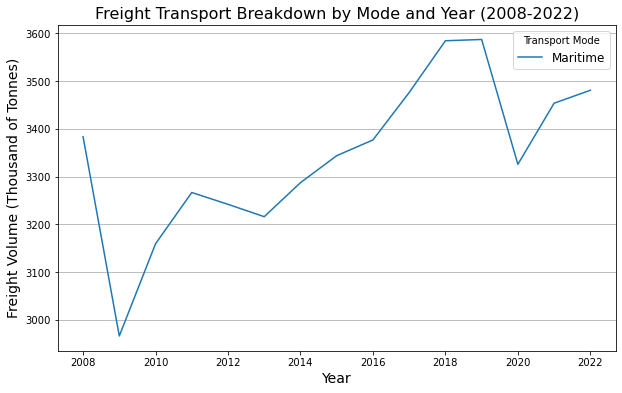

In [180]:
df['Maritime'].plot(figsize=(10, 6))
plt.title('Freight Transport Breakdown by Mode and Year (2008-2022)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Freight Volume (Thousand of Tonnes)', fontsize=14)
plt.legend(title='Transport Mode', bbox_to_anchor=(1, 1), fontsize=12)
plt.grid(axis='y')

# Save the figure
plt.savefig('Analysis_per_transport_EU/Maritime.png')

# Show the plot
plt.show()

## Air

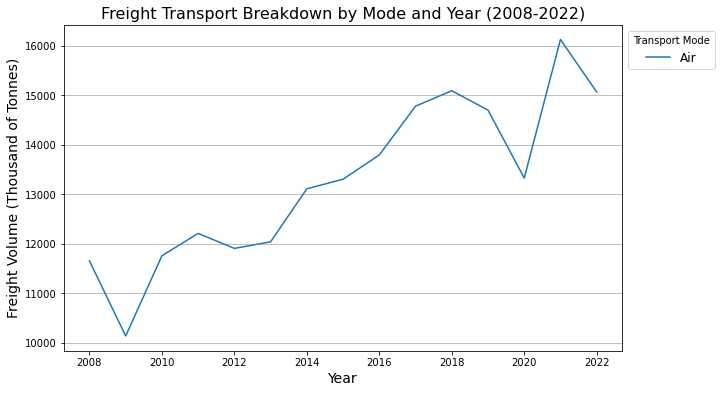

In [181]:
df['Air'].plot(figsize=(10, 6))
plt.title('Freight Transport Breakdown by Mode and Year (2008-2022)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Freight Volume (Thousand of Tonnes)', fontsize=14)
plt.legend(title='Transport Mode', bbox_to_anchor=(1, 1), fontsize=12)
plt.grid(axis='y')

# Save the figure
plt.savefig('Analysis_per_transport_EU/Air.png')

# Show the plot
plt.show()

## Grouped Bar Chart for Each Year Across Transport Modes

In [165]:
'''
df['Rail'] = df['Rail'] / df['Total']
df['Road'] = df['Road'] / df['Total']
df['Inland'] = df['Inland'] / df['Total']
df['Maritime'] = df['Maritime'] / df['Total']
df['Air'] = df['Air'] / df['Total']
'''

"\ndf['Rail'] = df['Rail'] / df['Total']\ndf['Road'] = df['Road'] / df['Total']\ndf['Inland'] = df['Inland'] / df['Total']\ndf['Maritime'] = df['Maritime'] / df['Total']\ndf['Air'] = df['Air'] / df['Total']\n"

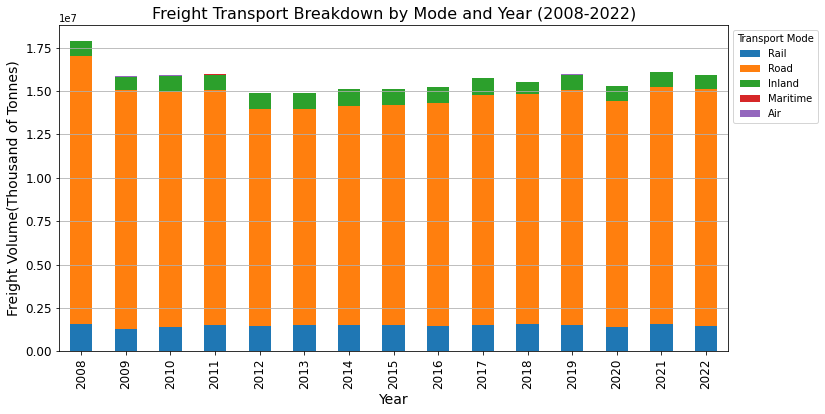

In [166]:
df[['Rail', 'Road', 'Inland', 'Maritime', 'Air']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Freight Transport Breakdown by Mode and Year (2008-2022)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Freight Volume(Thousand of Tonnes)', fontsize=14)
plt.legend(title='Transport Mode', bbox_to_anchor=(1, 1))
plt.grid(axis='y')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('Analysis_per_transport_EU/Stacked_Column_Chart.png')

plt.show()

## Pie Chart per Year

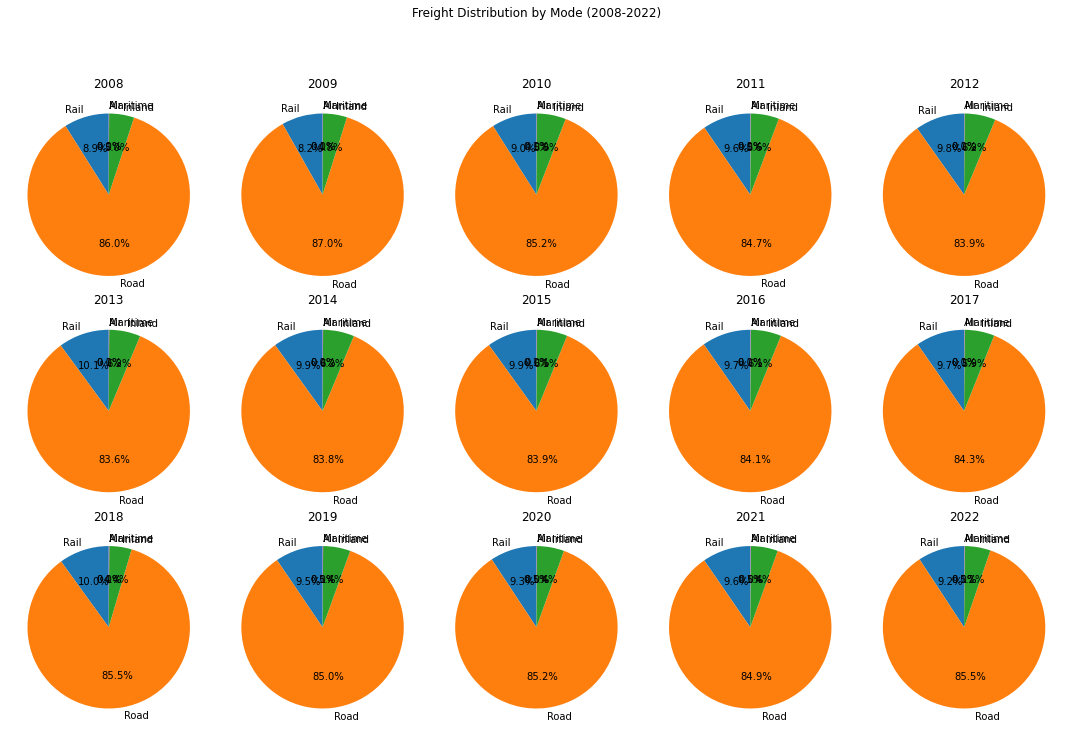

In [170]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))
fig.suptitle('Freight Distribution by Mode (2008-2022)', y=1.02)

for i, ax in enumerate(axes.flatten()):
    if i < len(df):
        year = df[['Rail', 'Road', 'Inland', 'Maritime', 'Air']].index[i]
        data_for_year = df[['Rail', 'Road', 'Inland', 'Maritime', 'Air']].loc[year]
        
        ax.pie(data_for_year, labels=data_for_year.index, autopct='%1.1f%%', startangle=90)
        ax.set_title(f'{year}')

# Adjust layout to prevent overlapping titles
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.savefig('Analysis_per_transport_EU/Pie_Per_Year.png')

plt.show()